Иморитирование всех необходимых библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Считываем тестовые данные

In [2]:
df = pd.read_csv("train.csv", low_memory=False)
print(f"\nДатасет имеет: {df.shape}")


Датасет имеет: (14456, 2666)


In [3]:
df.head(10)

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10850000.0,10850000.0,10850000.0,NaN,NaN,NaN,10850000.0,10850000.0,10850000.0,0.318994
6,2022-11-01,16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258853
7,2023-01-01,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
8,2023-01-01,18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
9,2022-02-01,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


Смотрим на пропуски в данных

In [4]:
print("Число пропущенных значений в датасете:")
print(df.isna().sum())

Число пропущенных значений в датасете:
report_date        0
client_id          0
target             0
col1           14453
col2           14450
               ...  
col2659        13950
col2660         6420
col2661         6420
col2662         6420
col2663            0
Length: 2666, dtype: int64


Визуализируем, сколько пропущенных значений в DataFrame.

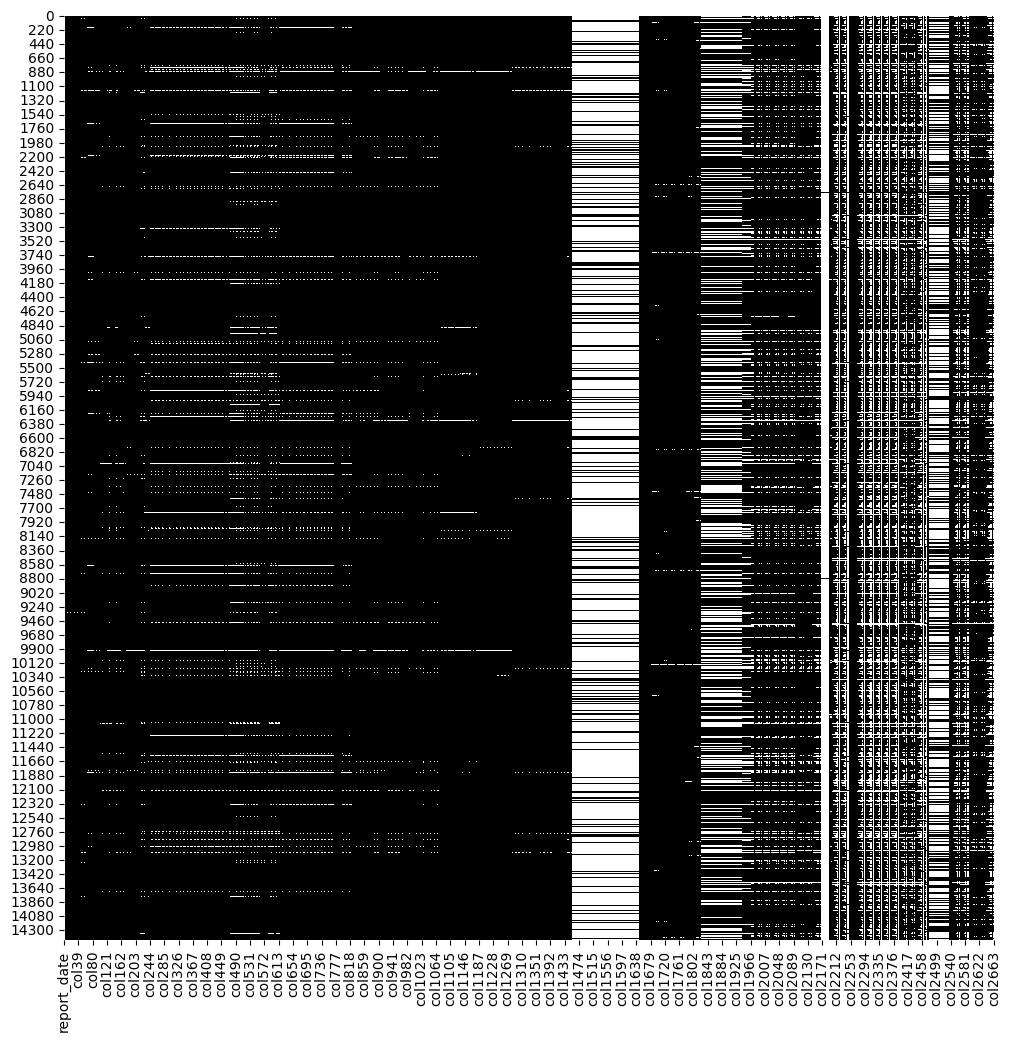

In [5]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.isnull(), cbar = False, cmap = 'Greys')
plt.show()

Обработка 

In [6]:
df.drop_duplicates(inplace=True) # дубликаты

threshold_col = 0.75 * len(df) # Удаление столбцов, где менее 75% значений присутствуют
df.dropna(axis=1, thresh=threshold_col, inplace=True)

threshold_row = 0.75 * len(df.columns)  # Удаление строк
df.dropna(thresh=threshold_row, inplace=True)

# Заполнение пропусков медианой только для числовых столбцов
numeric_cols = df.select_dtypes(include=['number']).columns
if not numeric_cols.empty:  # Проверка, есть ли числовые столбцы
    df.loc[:, numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
# df.loc потому что это срез оригинала df

# Удаление строк с NaN только в текстовых столбцах
string_cols = df.select_dtypes(include=['object']).columns
if not string_cols.empty:  # Проверка, есть ли строковые столбцы
    df.dropna(subset=string_cols, inplace=True)

Проверяем число пропущенных значений

In [7]:
print("Число пропущенных значений в датасете после обработки:")
print(df.isna().sum())

Число пропущенных значений в датасете после обработки:
report_date    0
client_id      0
target         0
col1453        0
col1454        0
              ..
col2460        0
col2461        0
col2462        0
col2470        0
col2663        0
Length: 247, dtype: int64


Визуализация, сколько пропущенных значений в DataFrame.

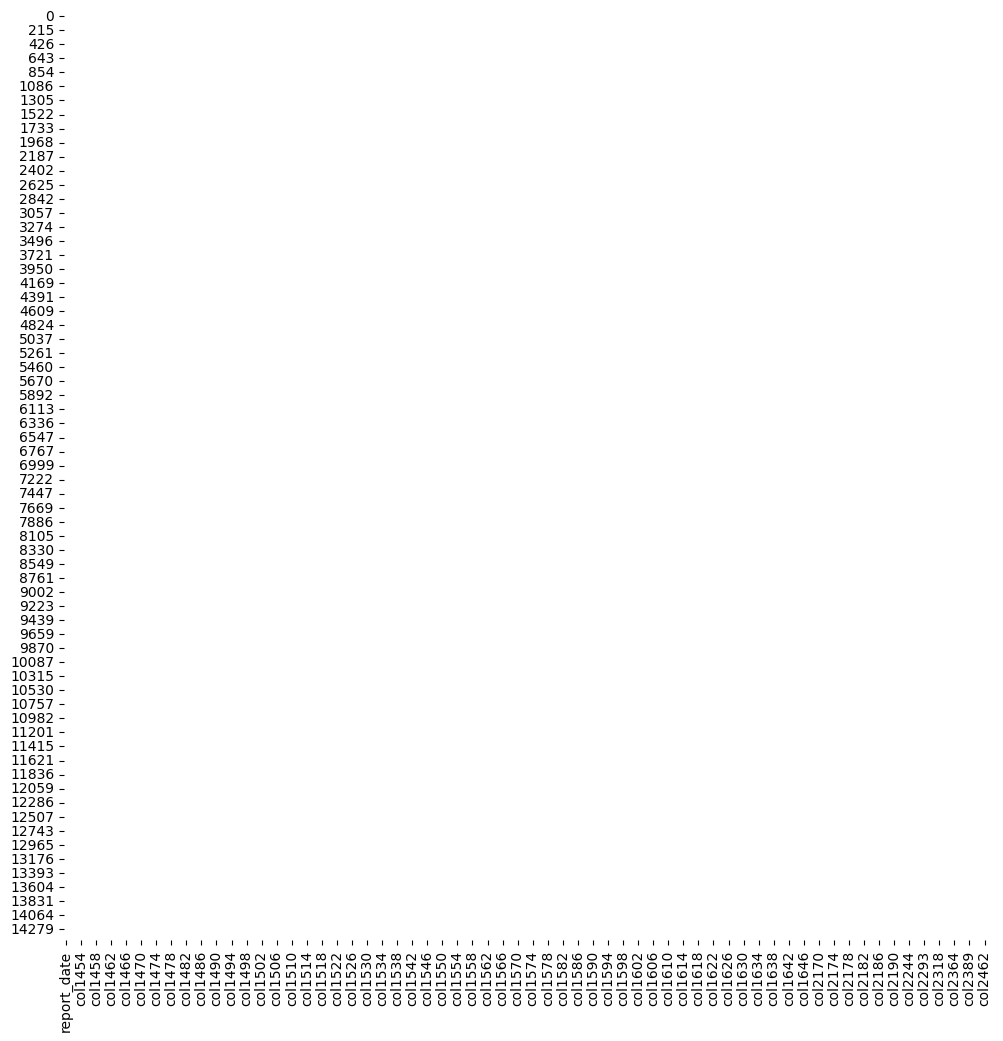


Датасет имеет: (11119, 247)


In [8]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.isnull(), cbar = False, cmap = 'Greys')
plt.show()
print(f"\nДатасет имеет: {df.shape}")

In [9]:
df.head(10)

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
0,2022-11-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,37.88,37.88,37.880,0.00,0.00,0.00,545.0,0.256261
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,38.75,3.34,21.045,0.00,0.00,0.00,242.0,0.256261
2,2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,36.75,36.75,36.750,2.10,2.10,2.10,557.0,0.256261
3,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,35.56,35.56,35.560,1.40,1.40,1.40,276.0,0.258682
4,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,54.52,54.52,54.520,2.28,2.28,2.28,256.0,0.254164
5,2023-02-01,10,0,0,07ca8162-5b7d-ed11-b824-005056b89b68,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,26.60,26.60,26.600,0.00,0.00,0.00,31.0,0.318994
6,2022-11-01,16,0,0,0a154951-7e02-47d2-8d3d-480d0c84c206,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,35.57,2.51,19.040,0.00,0.00,0.00,336.0,0.258853
7,2023-01-01,17,0,0,0aed31ac-cbe2-42cb-af39-8470ad01e8a4,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,66.48,3.58,35.030,0.00,0.00,0.00,1972.0,0.256261
8,2023-01-01,18,0,0,0b08a6bb-42f5-ec11-b822-005056b8a6d9,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,103.00,4.50,73.450,0.00,0.00,0.00,68.0,0.266285
9,2022-02-01,19,0,0,0b498e8a-7c01-466d-b112-0c5785574f45,0.0,1.0,1.0,1.0,1.0,...,2.0,2.0,60.18,60.18,60.180,0.00,0.00,0.00,364.0,0.256261
